This is an example of the use of the stochastic implementation of the graph sparsification using the gumbel distribution

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import torch

import graph_sparse as sp

/home/yannick/.local/lib/python3.10/site-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


In [2]:
def read_graph(file):
    G = nx.Graph()

    with open(file, "r") as f:
        for line in f.readlines():
            if line.startswith("#"):
                continue
            line = line.strip().split(" ")
            G.add_edge(int(line[0]), int(line[1]))

    return G


G = read_graph("KnowledgeBase.edges") 

m, n = G.number_of_edges(), G.number_of_nodes()
print("graph with %d edges and %d nodes"%(m,n))


graph with 39 edges and 25 nodes


Create a test graph

In [3]:
import random
import community as community_louvain
import matplotlib.cm as cm

seed = 10
np.random.seed(seed)
random.seed(seed)



def draw(G, pos, partition, with_labels=True):

        cmap = cm.get_cmap('Set2', max(partition.values()) + 1)
        
        plt.figure(figsize=(8,8))
        nx.draw_networkx(G, pos, nodelist = partition.keys(), cmap=cmap,
                        node_color=list(partition.values()), with_labels=with_labels)
        plt.show()
        

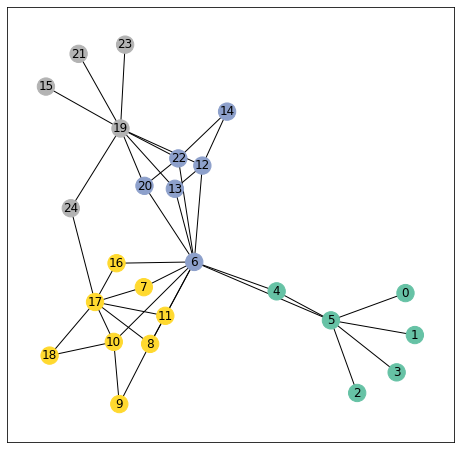

In [4]:
seed = 10
np.random.seed(seed)
random.seed(seed)


partition = community_louvain.best_partition(G, randomize=False)
pos = nx.spring_layout(G)
draw(G,pos, partition, True)


In [5]:
def experimet_vis(G, alpha, beta):

    w,sigma,E,theta,probs,cost_vec,histaory = sp.sparsification_stochastic(G, tau=1, 
                            n_samples=3, epochs=10000, lr=1e-2, 
                            beta=beta, alpha=alpha, loss_type = 'vn', seed=42, 
                            verbose=False,hard=True, plot_flag=False)
    res = sp.get_graph_from_incidence(E, w)
    draw(res, pos, partition, True)
    return res


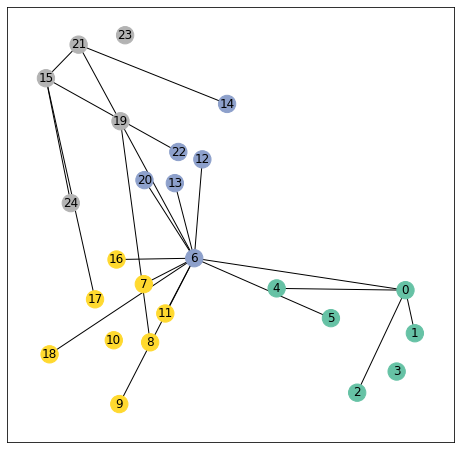

In [6]:
res = experimet_vis(G, alpha=0, beta=0)

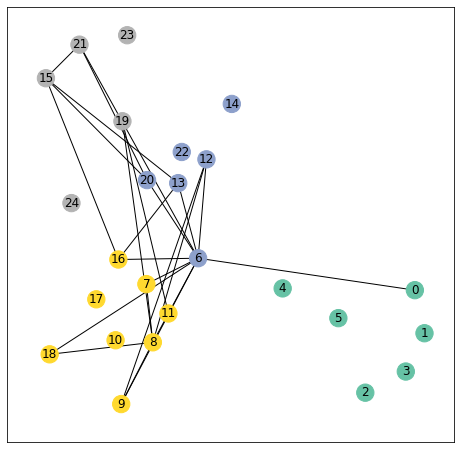

In [7]:
res = experimet_vis(G, alpha=0, beta=2)

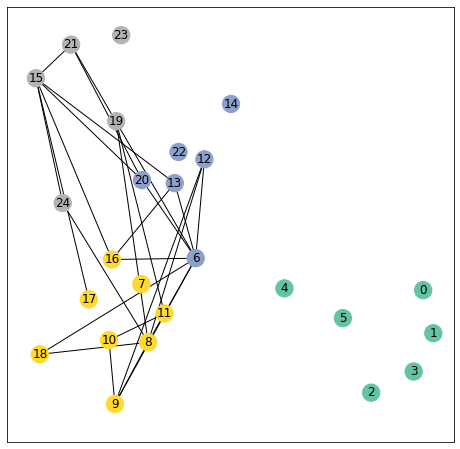

In [8]:
res = experimet_vis(G, alpha=0, beta=5)

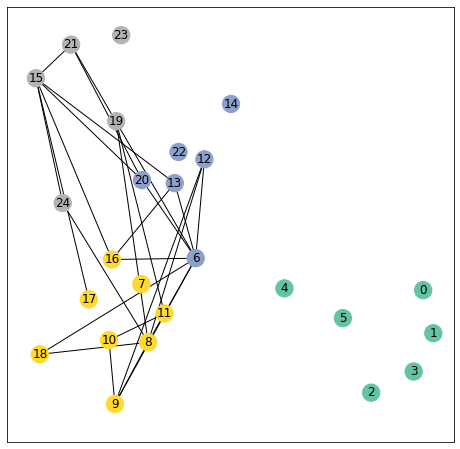

In [9]:
res = experimet_vis(G, alpha=0, beta=1000)

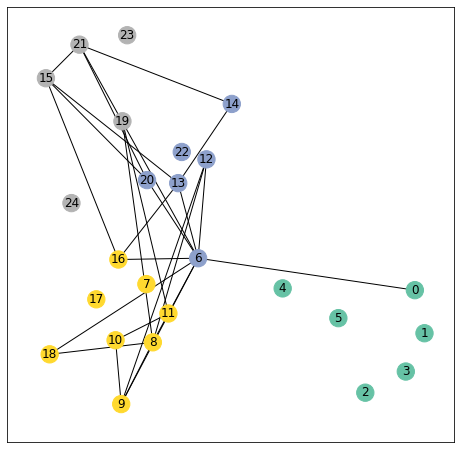

In [10]:
res = experimet_vis(G, alpha=0.001, beta=2)

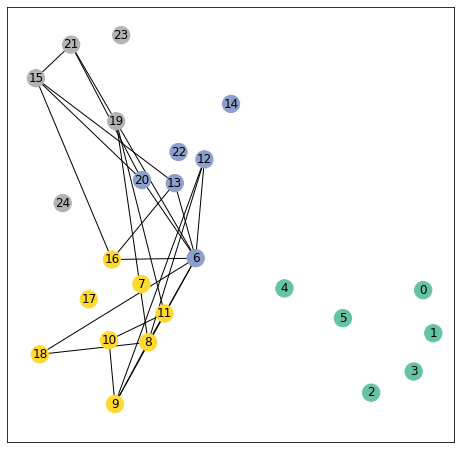

In [11]:
res = experimet_vis(G, alpha=0.001, beta=1000)